# Import the relevant libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
import random

# Load the image into a numpy array

In [0]:
path_to_jpg_file = "sample.jpg"
img = mpimg.imread(path_to_jpg_file)

In [3]:
img.shape

(1000, 1600, 3)

# Display the image

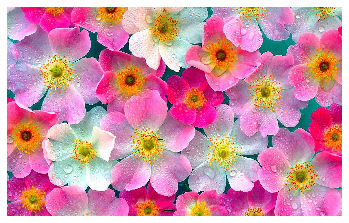

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Reshape the image

In [0]:
pixels = img.reshape((-1,3))

In [6]:
pixels.shape

(1600000, 3)

In [7]:
pixels[0]

array([241, 220, 251], dtype=uint8)

# Clustering for k=3

In [0]:
n_clusters = 3
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [0]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [10]:
c.head(3)

,R,G,B,label
0,241,220,251,0
1,229,208,239,0
2,217,196,227,0


### Map each pixel to its center

In [0]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [12]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,0,212.959869,173.868627,199.862259
1,229,208,239,0,212.959869,173.868627,199.862259
2,217,196,227,0,212.959869,173.868627,199.862259


### Plot the clustered image

In [0]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

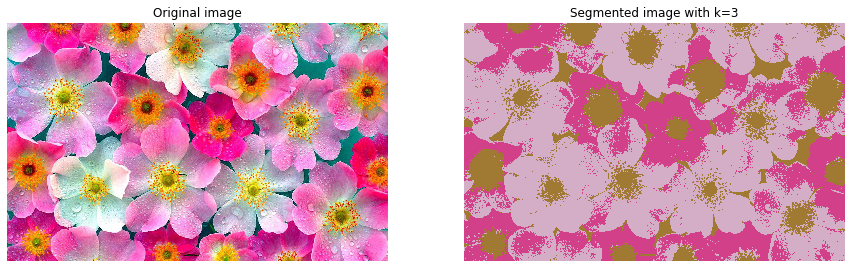

In [14]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Clustering for k=6

In [0]:
n_clusters = 6
kmeans = KMeans(n_clusters).fit(pixels)

### Determine label of each pixel

In [0]:
c = pd.DataFrame(pixels, columns=['R', 'G', 'B'])
c['label'] = kmeans.labels_ 

In [17]:
c.head(3)

,R,G,B,label
0,241,220,251,2
1,229,208,239,2
2,217,196,227,2


### Map each pixel to its center

In [0]:
centers_map_R = {i:kmeans.cluster_centers_[i][0] for i in range(n_clusters)}
centers_map_G = {i:kmeans.cluster_centers_[i][1] for i in range(n_clusters)}
centers_map_B = {i:kmeans.cluster_centers_[i][2] for i in range(n_clusters)}
c['R-center'] = c['label'].map(centers_map_R)
c['G-center'] = c['label'].map(centers_map_G)
c['B-center'] = c['label'].map(centers_map_B)

In [19]:
c.head(3)

,R,G,B,label,R-center,G-center,B-center
0,241,220,251,2,227.357171,203.791766,221.791248
1,229,208,239,2,227.357171,203.791766,221.791248
2,217,196,227,2,227.357171,203.791766,221.791248


### Plot the clustered image

In [0]:
new_pixels = c[['R-center', 'G-center', 'B-center']].values
new_img = new_pixels.reshape((img.shape))/255.0

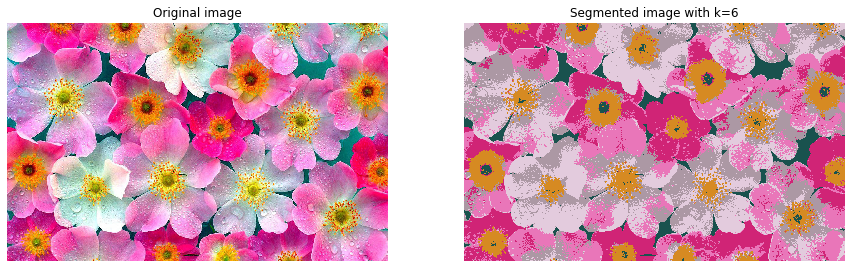

In [21]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')

plt.subplot(1,2,2)
plt.imshow(new_img)
plt.axis('off')
plt.title(f'Segmented image with k={n_clusters}')

plt.show()

# Use the Elbow method to find the optimum k value for this image

In [22]:
# a list of within-cluster sum of squares (WCSS) for each clustering solution
wcss =[]
k_range = range(2, 21)
for k in k_range:
    print(f'Processing k={k}')
    kmeans = KMeans(k)
    kmeans.fit(pixels)
    wcss.append(kmeans.inertia_)
    
wcss

Processing k=2
Processing k=3
Processing k=4
Processing k=5
Processing k=6
Processing k=7
Processing k=8
Processing k=9
Processing k=10
Processing k=11
Processing k=12
Processing k=13
Processing k=14
Processing k=15
Processing k=16
Processing k=17
Processing k=18
Processing k=19
Processing k=20


[10235088467.762829,
 8012999972.118666,
 5972139016.029619,
 4595661083.862337,
 3784705354.2650247,
 3383744487.893022,
 3046840226.6173596,
 2752314259.3010635,
 2520791357.4317627,
 2343136603.9170036,
 2175869362.221935,
 2037879271.1087112,
 1922548462.4652114,
 1822091034.127196,
 1732340238.5248873,
 1647437435.5178745,
 1577577536.563471,
 1510096431.9993217,
 1453764442.5379343]

### Plot the number of clusters vs WCSS

AttributeError: ignored

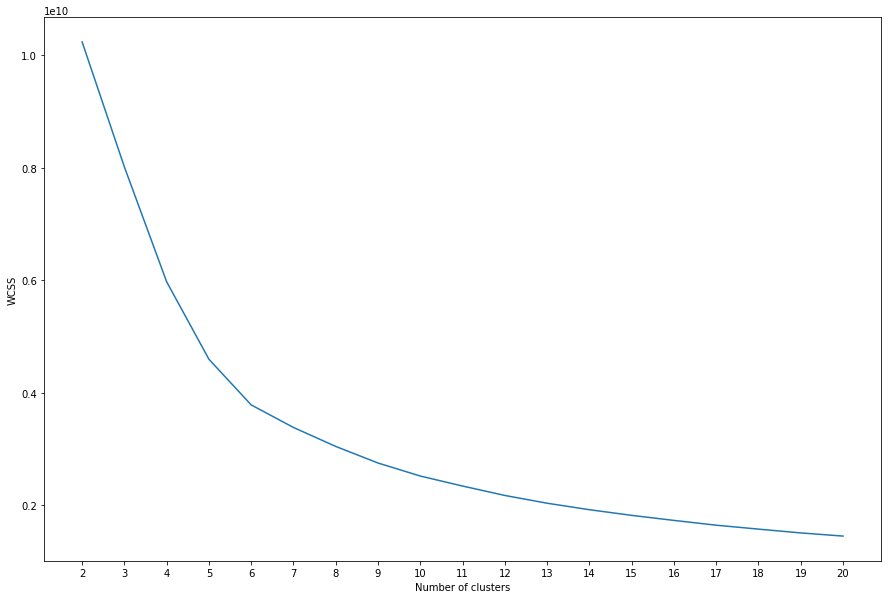

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(k_range, wcss)
ax.set_xticks(k_range)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('WCSS')
ax.xlim()
plt.show()

In [0]:
The plot demonstrates that k=6 is the optimum value